In [30]:
# Importamos el módulo con nuestras funciones
import sys
sys.path.append('./../../')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import statsmodels.api as sm
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
cpa_reg = pd.read_csv('../../results/data_results/componentes_principales_regress.csv')
# cpa_reg = pd.read_csv('../../results/data_results/componentes_principales_var_exp.csv')
df = pd.read_csv('../../data/datos_limpios.csv', encoding = "L1")

In [33]:
cpa_reg.head()

,0,1,0.1,1.1,0.2,1.2,2,0.3,0.4,1.3,...,3,0.12,0.13,0.14,0.15,1.8,2.6,3.1,0.16,1.9
0,-2.751152,1.038033,-0.030844,-0.040263,2.654835,-0.126711,0.992496,-0.281886,-0.751822,-0.670241,...,-1.519230,-0.463121,0.484419,-2.440784,0.057894,-2.046811,0.299760,-0.300943,0.063128,0.234068
1,1.439305,-0.274336,0.605189,0.816913,0.244777,-0.627959,-2.188335,-1.508087,-0.018447,-0.246731,...,1.163049,-1.161639,0.527483,0.147711,-0.890272,0.728962,-0.928457,-0.284100,1.805044,0.408059
2,-0.075647,-1.163561,-0.737430,1.031727,0.366210,0.129824,0.785720,1.129132,0.637087,1.068688,...,-1.419631,1.150877,0.999981,2.228617,-0.667982,-1.046108,-0.431368,-0.198526,1.397283,-0.886976
3,-2.054591,0.706529,0.832951,0.426113,2.503022,-1.133014,-1.519482,-1.555394,-0.579509,1.381914,...,0.760784,0.028944,-0.435190,0.147711,-0.950924,0.835407,2.582318,0.606692,-0.501992,-1.849675
4,-0.592569,1.411202,1.640749,-0.793292,0.979646,0.587305,-0.811460,0.263456,0.590726,-0.127315,...,-1.148256,-0.738224,-0.634469,0.790361,0.711803,0.430322,-0.714230,-0.166337,1.741845,-0.601219


In [34]:
df.head()

,nofolio,genero,ent,nom_ent,cct,modalidad,sost,subsist,hlec,nvl_esp,...,p70_E,p70_F,p70_G,p70_H,p74_A,p74_B,p74_C,p74_D,p74_E,p74_F
0,010000023B16,M,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,-0.76369,I,...,0,0,0,0,1,0,0,0,0,0
1,010000037B16,H,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.97389,III,...,0,0,0,0,1,0,0,0,0,0
2,010000008B16,M,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.26655,II,...,0,0,0,0,1,0,0,0,0,0
3,010000035B16,H,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.36393,II,...,0,0,0,0,1,0,0,0,0,0
4,010000032B16,H,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.97389,III,...,0,0,0,0,0,0,0,1,0,0


In [35]:
hlec = df['hlec']
hlec.head()

0   -0.76369
1    0.97389
2    0.26655
3    0.36393
4    0.97389
Name: hlec, dtype: float64

In [36]:
hmat = df['hmat']
hmat.head()

0   -1.10088
1   -0.37852
2    0.27625
3   -0.37852
4    0.27625
Name: hmat, dtype: float64

In [37]:
cpa_reg_hlen = pd.concat([hlec,cpa_reg], axis =1)
cpa_reg_hlen.head()

,hlec,0,1,0.1,1.1,0.2,1.2,2,0.3,0.4,...,3,0.12,0.13,0.14,0.15,1.8,2.6,3.1,0.16,1.9
0,-0.76369,-2.751152,1.038033,-0.030844,-0.040263,2.654835,-0.126711,0.992496,-0.281886,-0.751822,...,-1.519230,-0.463121,0.484419,-2.440784,0.057894,-2.046811,0.299760,-0.300943,0.063128,0.234068
1,0.97389,1.439305,-0.274336,0.605189,0.816913,0.244777,-0.627959,-2.188335,-1.508087,-0.018447,...,1.163049,-1.161639,0.527483,0.147711,-0.890272,0.728962,-0.928457,-0.284100,1.805044,0.408059
2,0.26655,-0.075647,-1.163561,-0.737430,1.031727,0.366210,0.129824,0.785720,1.129132,0.637087,...,-1.419631,1.150877,0.999981,2.228617,-0.667982,-1.046108,-0.431368,-0.198526,1.397283,-0.886976
3,0.36393,-2.054591,0.706529,0.832951,0.426113,2.503022,-1.133014,-1.519482,-1.555394,-0.579509,...,0.760784,0.028944,-0.435190,0.147711,-0.950924,0.835407,2.582318,0.606692,-0.501992,-1.849675
4,0.97389,-0.592569,1.411202,1.640749,-0.793292,0.979646,0.587305,-0.811460,0.263456,0.590726,...,-1.148256,-0.738224,-0.634469,0.790361,0.711803,0.430322,-0.714230,-0.166337,1.741845,-0.601219


In [38]:
cpa_reg_hmat = pd.concat([hmat,cpa_reg], axis =1)
cpa_reg_hmat.head()

,hmat,0,1,0.1,1.1,0.2,1.2,2,0.3,0.4,...,3,0.12,0.13,0.14,0.15,1.8,2.6,3.1,0.16,1.9
0,-1.10088,-2.751152,1.038033,-0.030844,-0.040263,2.654835,-0.126711,0.992496,-0.281886,-0.751822,...,-1.519230,-0.463121,0.484419,-2.440784,0.057894,-2.046811,0.299760,-0.300943,0.063128,0.234068
1,-0.37852,1.439305,-0.274336,0.605189,0.816913,0.244777,-0.627959,-2.188335,-1.508087,-0.018447,...,1.163049,-1.161639,0.527483,0.147711,-0.890272,0.728962,-0.928457,-0.284100,1.805044,0.408059
2,0.27625,-0.075647,-1.163561,-0.737430,1.031727,0.366210,0.129824,0.785720,1.129132,0.637087,...,-1.419631,1.150877,0.999981,2.228617,-0.667982,-1.046108,-0.431368,-0.198526,1.397283,-0.886976
3,-0.37852,-2.054591,0.706529,0.832951,0.426113,2.503022,-1.133014,-1.519482,-1.555394,-0.579509,...,0.760784,0.028944,-0.435190,0.147711,-0.950924,0.835407,2.582318,0.606692,-0.501992,-1.849675
4,0.27625,-0.592569,1.411202,1.640749,-0.793292,0.979646,0.587305,-0.811460,0.263456,0.590726,...,-1.148256,-0.738224,-0.634469,0.790361,0.711803,0.430322,-0.714230,-0.166337,1.741845,-0.601219


# Regresión de hlec y las componentes

In [39]:
X = cpa_reg
y = hlec 

In [40]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 

In [41]:
# create linear regression object 
reg = linear_model.LinearRegression() 

In [42]:
# train the model using the training sets 
reg.fit(X_train, y_train) 

LinearRegression()

In [43]:
# regression coefficients 
print('Coefficients: \n', reg.coef_) 

Coefficients: 
 [ 0.00884444 -0.03642049  0.00935823  0.01542866 -0.01332017 -0.06170501
 -0.00481162 -0.01596278  0.0023619  -0.03518621  0.0203665   0.06477975
  0.01278108 -0.13265428 -0.00584917  0.02943299 -0.00728553 -0.04740986
 -0.10492716 -0.02663938 -0.01632993  0.00735427 -0.02506774 -0.00290671
 -0.06696881 -0.00432268  0.02757981 -0.01285808  0.01798439 -0.00827424
 -0.00296596  0.05625564 -0.00730961 -0.01720045 -0.00735842  0.00834373]


In [44]:
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Variance score: 0.2643361242007993


In [45]:
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 

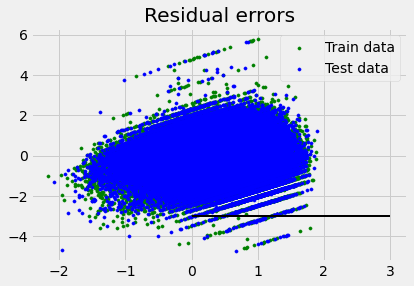

In [46]:
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
## plotting line for zero residual error 
plt.hlines(y = -3, xmin = 0, xmax = 3, linewidth = 2) 
## plotting legend 
plt.legend(loc = 'upper right') 
## plot title 
plt.title("Residual errors")
## function to show plot 
plt.show() 

# Regresión de hmat y las componentes

In [47]:
X = cpa_reg
y = hmat 

In [48]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 

In [49]:
# create linear regression object 
reg = linear_model.LinearRegression() 

In [50]:
# train the model using the training sets 
reg.fit(X_train, y_train) 

LinearRegression()

In [51]:
# regression coefficients 
print('Coefficients: \n', reg.coef_) 

Coefficients: 
 [ 0.02364526 -0.01020366  0.00027426  0.03141544  0.01088304 -0.03396231
  0.00338845 -0.04224146  0.01629888 -0.02269624  0.04920126  0.04352879
  0.0205136  -0.14113877  0.01710098  0.04587362 -0.00084834 -0.01137335
 -0.1119257  -0.03345056 -0.01173476  0.00014201  0.00111079 -0.0215863
 -0.04253005 -0.00596915  0.00914234 -0.00235285  0.00830866 -0.01040217
  0.00270349  0.05171047 -0.02426478 -0.01888988 -0.00963448  0.02554561]


In [52]:
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Variance score: 0.19193344648735233


In [53]:
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 

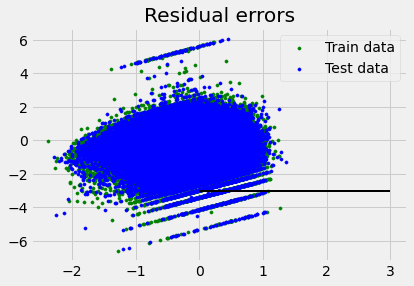

In [54]:
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
## plotting line for zero residual error 
plt.hlines(y = -3, xmin = 0, xmax = 3, linewidth = 2) 
## plotting legend 
plt.legend(loc = 'upper right') 
## plot title 
plt.title("Residual errors")
## function to show plot 
plt.show() 

Usando la otra paquetería:

In [55]:
#Corriendo un modelo lineal para hmat
model_hmat = sm.OLS(hmat, cpa_reg).fit()

In [56]:
model_hmat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   hmat   R-squared (uncentered):                   0.173
Model:                            OLS   Adj. R-squared (uncentered):              0.173
Method:                 Least Squares   F-statistic:                              3248.
Date:                Sun, 24 May 2020   Prob (F-statistic):                        0.00
Time:                        00:25:53   Log-Likelihood:                     -6.9627e+05
No. Observations:              560626   AIC:                                  1.393e+06
Df Residuals:                  560590   BIC:                                  1.393e+06
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0250      0.001     33.154      0.000       0.024       0.026
1             -0.0115      0.001     -9.500      0.000      -0.014      -0.009
0.1         -4.31e-05      0.001     -0.045      0.964      -0.002       0.002
1.1            0.0317      0.001     35.758      0.000       0.030       0.033
0.2            0.0120      0.001     15.410      0.000       0.011       0.014
1.2           -0.0332      0.001    -31.733      0.000      -0.035      -0.031
2              0.0031      0.001      2.774      0.006       0.001       0.005
0.3           -0.0422      0.001    -53.937      0.000      -0.044      -0.041
0.4            0.0160      0.001     22.443      0.000       0.015       0.017
1.3           -0.0227      0.001    -26.563      0.000      -0.024      -0.021
2.1            0.0485      0.001     47.415      0.000       0.046       0.051
0.5            0.0447      0.001     58.100      0.000       0.043       0.046
0.6            0.0206      0.001     25.342      0.000       0.019       0.022
0.7           -0.1411      0.001   -127.487      0.000      -0.143      -0.139
1.4            0.0170      0.001     15.575      0.000       0.015       0.019
2.2            0.0459      0.001     38.730      0.000       0.044       0.048
0.8           -0.0006      0.001     -0.588      0.556      -0.003       0.001
1.5           -0.0119      0.001    -10.331      0.000      -0.014      -0.010
2.3           -0.1110      0.001    -93.983      0.000      -0.113      -0.109
0.9           -0.0343      0.001    -32.478      0.000      -0.036      -0.032
1.6           -0.0115      0.001    -10.454      0.000      -0.014      -0.009
2.4            0.0016      0.001      1.401      0.161      -0.001       0.004
0.10           0.0025      0.001      3.161      0.002       0.001       0.004
0.11          -0.0212      0.000    -43.184      0.000      -0.022      -0.020
1.7           -0.0424      0.001    -54.019      0.000      -0.044      -0.041
2.5           -0.0063      0.001     -6.390      0.000      -0.008      -0.004
3              0.0098      0.001      9.033      0.000       0.008       0.012
0.12          -0.0025      0.001     -4.175      0.000      -0.004      -0.001
0.13           0.0076      0.001     11.633      0.000       0.006       0.009
0.14          -0.0101      0.001    -13.932      0.000      -0.012      -0.009
0.15           0.0027      0.001      3.025      0.002       0.001       0.005
1.8            0.0507      0.001     55.644      0.000       0.049       0.052
2.6           -0.0244      0.001    -25.123      0.000      -0.026      -0.023
3.1           -0.0160      0.001    -14.190      0.000      -0.018      -0.014
0.16          -0.0107      0.001    -13.944      0.000      -

In [57]:
#Corriendo un modelo lineal para hmat
model_hmat = sm.OLS(hlec, cpa_reg).fit()

In [58]:
model_hmat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   hlec   R-squared (uncentered):                   0.235
Model:                            OLS   Adj. R-squared (uncentered):              0.235
Method:                 Least Squares   F-statistic:                              4794.
Date:                Sun, 24 May 2020   Prob (F-statistic):                        0.00
Time:                        00:25:57   Log-Likelihood:                     -6.5532e+05
No. Observations:              560626   AIC:                                  1.311e+06
Df Residuals:                  560590   BIC:                                  1.311e+06
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0094      0.001     13.462      0.000       0.008       0.011
1             -0.0373      0.001    -33.281      0.000      -0.040      -0.035
0.1            0.0093      0.001     10.538      0.000       0.008       0.011
1.1            0.0145      0.001     17.514      0.000       0.013       0.016
0.2           -0.0131      0.001    -18.041      0.000      -0.015      -0.012
1.2           -0.0605      0.001    -62.211      0.000      -0.062      -0.059
2             -0.0056      0.001     -5.452      0.000      -0.008      -0.004
0.3           -0.0170      0.001    -23.343      0.000      -0.018      -0.016
0.4            0.0023      0.001      3.475      0.001       0.001       0.004
1.3           -0.0339      0.001    -42.642      0.000      -0.035      -0.032
2.1            0.0185      0.001     19.505      0.000       0.017       0.020
0.5            0.0656      0.001     91.822      0.000       0.064       0.067
0.6            0.0129      0.001     17.081      0.000       0.011       0.014
0.7           -0.1335      0.001   -129.786      0.000      -0.136      -0.131
1.4           -0.0047      0.001     -4.593      0.000      -0.007      -0.003
2.2            0.0300      0.001     27.180      0.000       0.028       0.032
0.8           -0.0070      0.001     -7.001      0.000      -0.009      -0.005
1.5           -0.0468      0.001    -43.592      0.000      -0.049      -0.045
2.3           -0.1052      0.001    -95.810      0.000      -0.107      -0.103
0.9           -0.0273      0.001    -27.845      0.000      -0.029      -0.025
1.6           -0.0168      0.001    -16.437      0.000      -0.019      -0.015
2.4            0.0081      0.001      7.792      0.000       0.006       0.010
0.10          -0.0238      0.001    -33.065      0.000      -0.025      -0.022
0.11          -0.0031      0.000     -6.822      0.000      -0.004      -0.002
1.7           -0.0656      0.001    -89.911      0.000      -0.067      -0.064
2.5           -0.0045      0.001     -4.935      0.000      -0.006      -0.003
3              0.0281      0.001     27.978      0.000       0.026       0.030
0.12          -0.0131      0.001    -23.369      0.000      -0.014      -0.012
0.13           0.0182      0.001     29.936      0.000       0.017       0.019
0.14          -0.0084      0.001    -12.503      0.000      -0.010      -0.007
0.15          -0.0027      0.001     -3.203      0.001      -0.004      -0.001
1.8            0.0565      0.001     66.669      0.000       0.055       0.058
2.6           -0.0072      0.001     -7.943      0.000      -0.009      -0.005
3.1           -0.0155      0.001    -14.814      0.000      -0.018      -0.013
0.16          -0.0079      0.001    -11.071      0.000      -

Importamos los data sets que contienen las componentes de cada sección: